<a href="https://colab.research.google.com/github/Ankita-lohakare/Ankita_Meta_Scifor_Technologies/blob/main/Practise__Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


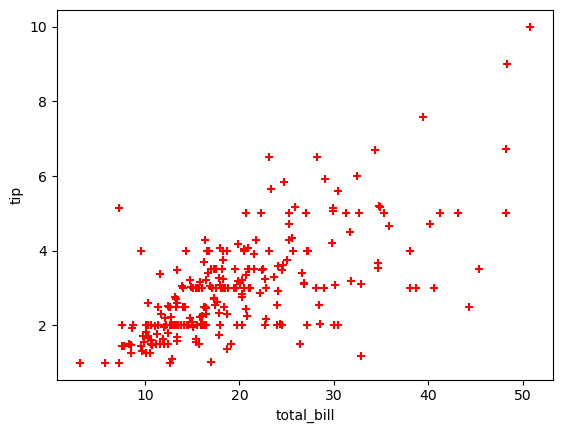

In [ ]:
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.scatter(df.total_bill,df.tip,color='red',marker='+')

In [ ]:
x = df['total_bill'].values
y = df['tip'].values

In [ ]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Adding a column of ones for the intercept term
x_train = np.vstack((np.ones_like(x_train), x_train)).T
x_test = np.vstack((np.ones_like(x_test), x_test)).T


In [ ]:
# Function to perform linear regression
#WE ARE WRITING LINEAR REGRESSION ALGORITHM

def linear_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights with zeros
    cost_list = []
#gradient descent
    for _ in range(epochs):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient

        # Calculate the cost
        cost = (1/(2*m)) * np.sum(error**2)
        cost_list.append(cost)

    return weights, cost_list

In [ ]:
# Train the model
learning_rate = 0.000001
epochs = 1000 # YOUR MODEL WILL GET PASS THROUGH THE DATASET 1000
weights, cost_list = linear_regression(x_train, y_train, learning_rate, epochs)
#learning rate is directly proportional to epochs

# Predict on the test set
y_pred_test = np.dot(x_test, weights)

# Calculate regression metrics

mse = np.mean((y_test - y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)

In [ ]:
# Print regression metrics

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 3.2809972973598374
Root Mean Squared Error (RMSE): 1.8113523393751525
Mean Absolute Error (MAE): 1.6289799124754507
R-squared: 0.9464314691926525


In [ ]:
# Create a DataFrame to display actual values, predicted values, and differences
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_test,
    'Difference (Actual - Predicted)': y_test - y_pred_test
})

# Print the DataFrame
print(results_df.head(10))

   Actual Values  Predicted Values  Difference (Actual - Predicted)
0           3.18          1.111069                         2.068931
1           2.00          0.493009                         1.506991
2           2.00          1.375633                         0.624367
3           5.16          1.450583                         3.709417
4           2.00          0.729606                         1.270394
5           2.00          1.003119                         0.996881
6           2.56          1.593212                         0.966788
7           2.52          0.700521                         1.819479
8           3.23          0.829167                         2.400833
9           3.00          0.862727                         2.137273


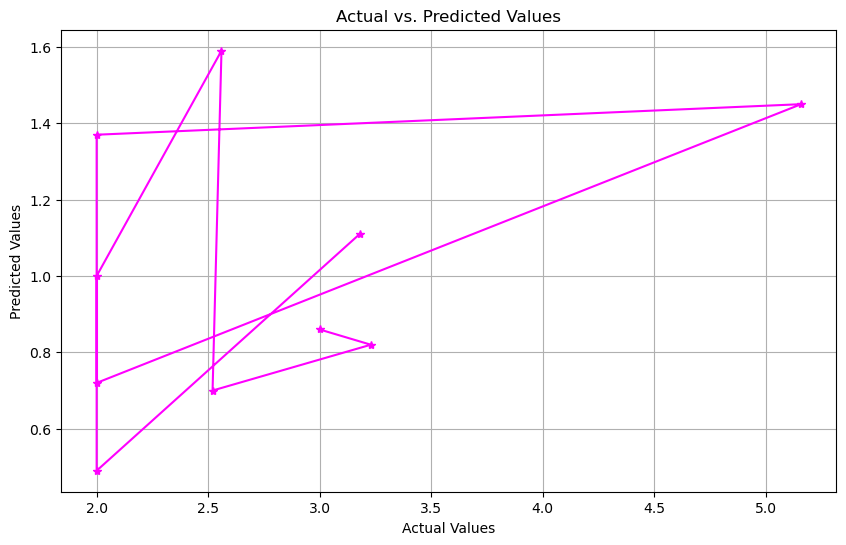

In [ ]:

# Create a DataFrame
data = {
    'Actual Values': [3.18, 2.00, 2.00, 5.16, 2.00, 2.00, 2.56, 2.52, 3.23, 3.00],
    'Predicted Values': [1.11, 0.49, 1.37, 1.45, 0.72, 1.00, 1.59, 0.70, 0.82, 0.86]
}

df = pd.DataFrame(data)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Actual Values'], df['Predicted Values'], marker='*', linestyle='-', color='Magenta')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)

# Display the plot
plt.show()